In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

In [56]:
seed = 38
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

train_0 = train_df[train_df.iloc[:, -1] == 0]
train_1 = train_df[train_df.iloc[:, -1] == 1]
train_2 = train_df[train_df.iloc[:, -1] == 2]
train_3 = train_df[train_df.iloc[:, -1] == 3]
train_4 = train_df[train_df.iloc[:, -1] == 4]

def oversample_class(df_class, target_size=60000, random_state=42):
    if len(df_class) < target_size:
        return df_class.sample(target_size, replace=True, random_state=random_state)
    else:
        return df_class.sample(target_size, replace=False, random_state=random_state)

train_1_oversampled = oversample_class(train_1)
train_2_oversampled = oversample_class(train_2)
train_3_oversampled = oversample_class(train_3)

train_balanced = pd.concat([train_0, train_1_oversampled, train_2_oversampled, train_3_oversampled, train_4], axis=0)
train_balanced = train_balanced.sample(frac=1, random_state=42)  


scaler = MinMaxScaler(feature_range=(0, 1))

x_train_balanced = train_balanced.iloc[:, :-1]
y_train_balanced = train_balanced.iloc[:, -1]

x_train_scaled = scaler.fit_transform(x_train_balanced)
x_test_scaled = scaler.transform(x_test) 

train_df_scaled = pd.DataFrame(x_train_scaled)
train_df_scaled['label'] = y_train_balanced.values

test_df_scaled = pd.DataFrame(x_test_scaled)
test_df_scaled['label'] = y_test.values

x_train_0 = train_df_scaled[train_df_scaled['label'] == 0].iloc[:, :-1]
x_train_1 = train_df_scaled[train_df_scaled['label'] == 1].iloc[:, :-1]
x_train_2 = train_df_scaled[train_df_scaled['label'] == 2].iloc[:, :-1]
x_train_3 = train_df_scaled[train_df_scaled['label'] == 3].iloc[:, :-1]
x_train_4 = train_df_scaled[train_df_scaled['label'] == 4].iloc[:, :-1]

x_test_0 = test_df_scaled[test_df_scaled['label'] == 0].iloc[:, :-1]
x_test_1 = test_df_scaled[test_df_scaled['label'] == 1].iloc[:, :-1]
x_test_2 = test_df_scaled[test_df_scaled['label'] == 2].iloc[:, :-1]
x_test_3 = test_df_scaled[test_df_scaled['label'] == 3].iloc[:, :-1]
x_test_4 = test_df_scaled[test_df_scaled['label'] == 4].iloc[:, :-1]


In [58]:
print("Tamaño por clase en entrenamiento:")
print("Clase 0:", len(x_train_0))
print("Clase 1:", len(x_train_1))
print("Clase 2:", len(x_train_2))
print("Clase 3:", len(x_train_3))
print("Clase 4:", len(x_train_4))

Tamaño por clase en entrenamiento:
Clase 0: 72471
Clase 1: 60000
Clase 2: 60000
Clase 3: 60000
Clase 4: 6431


In [59]:
def build_autoencoder_standard(input_dim):
    entrada = Input(shape=(input_dim,))
    x = Dense(128, activation='relu')(entrada)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    salida = Dense(input_dim, activation='sigmoid')(x)
    return Model(inputs=entrada, outputs=salida)

def build_autoencoder_more_complex(input_dim):
    entrada = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(entrada)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    salida = Dense(input_dim, activation='sigmoid')(x)
    return Model(inputs=entrada, outputs=salida)


dim_entrada = 187

autoencoder_0 = build_autoencoder_standard(dim_entrada)
autoencoder_1 = build_autoencoder_standard(dim_entrada)
autoencoder_2 = build_autoencoder_standard(dim_entrada)
autoencoder_3 = build_autoencoder_more_complex(dim_entrada)
autoencoder_4 = build_autoencoder_standard(dim_entrada)


Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.3027 - val_loss: 0.2656
Epoch 2/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2018 - val_loss: 0.1418
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1282 - val_loss: 0.1181
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1152 - val_loss: 0.1126
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1093 - val_loss: 0.1030
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0916 - val_loss: 0.0783
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0710 - val_loss: 0.0643
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0625 - val_loss: 0.0604
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0593 - val_loss: 0.0580
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0578 - val_loss: 0.0573

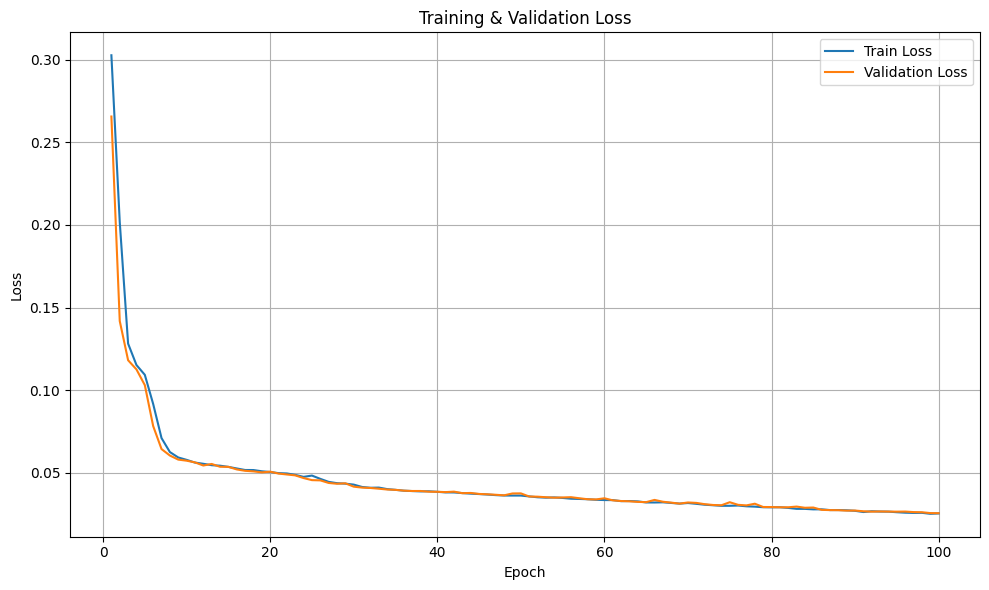

In [60]:
autoencoder_4.compile(optimizer='adam', loss='mae')

historia = autoencoder_4.fit(
    x_train_4, x_train_4,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_4, x_test_4),
    shuffle=True
)
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

51/51 [==============================] - 0s 578us/step


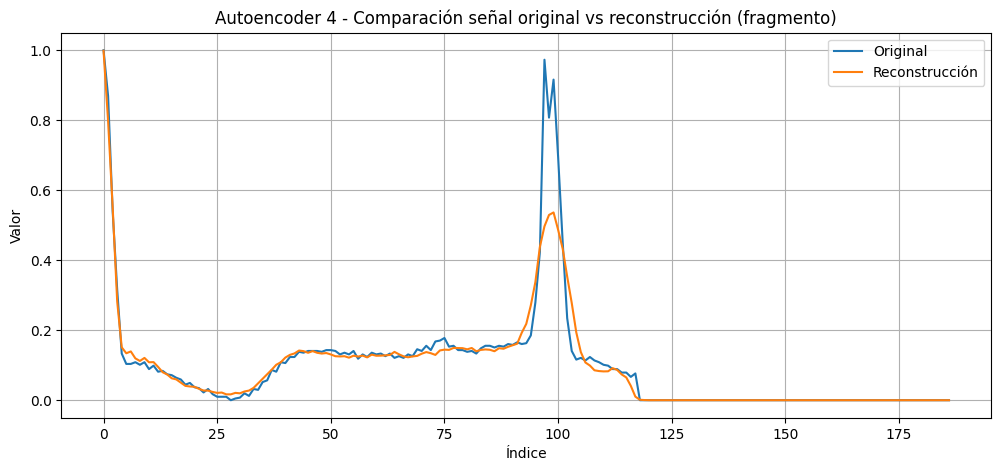

Autoencoder 4 - Error promedio reconstrucción (MAE): 0.025533
Autoencoder 4 - Errores primeras 5 muestras:
Muestra 0: 0.016929
Muestra 1: 0.073386
Muestra 2: 0.028974
Muestra 3: 0.025745
Muestra 4: 0.029058


In [ ]:
ind = 0
fragmento = 1000 

reconstructions_4 = autoencoder_4.predict(x_test_4)

original_4 = x_test_4.iloc[ind].to_numpy().flatten()
reconstruida_4 = reconstructions_4[ind].flatten()

plt.figure(figsize=(12,5))
plt.plot(original_4[:fragmento], label='Original')
plt.plot(reconstruida_4[:fragmento], label='Reconstrucción')
plt.legend()
plt.title('Autoencoder 4 - Comparación señal original vs reconstrucción (fragmento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

errors_4 = np.mean(np.abs(reconstructions_4 - x_test_4.to_numpy()), axis=1)
print(f"Autoencoder 4 - Error promedio reconstrucción (MAE): {np.mean(errors_4):.6f}")
print("Autoencoder 4 - Errores primeras 5 muestras:")
for i in range(5):
    print(f"Muestra {i}: {errors_4[i]:.6f}")


Epoch 1/50
118/118 [==============================] - 3s 23ms/step - loss: 0.1087 - val_loss: 0.0414
Epoch 2/50
118/118 [==============================] - 3s 23ms/step - loss: 0.0329 - val_loss: 0.0276
Epoch 3/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0266 - val_loss: 0.0240
Epoch 4/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0233 - val_loss: 0.0211
Epoch 5/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0202 - val_loss: 0.0192
Epoch 6/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0179 - val_loss: 0.0183
Epoch 7/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 8/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0152 - val_loss: 0.0162
Epoch 9/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0143 - val_loss: 0.0162
Epoch 10/50
118/118 [==============================] - 3s 22ms/step - loss: 0.0137 - val_lo

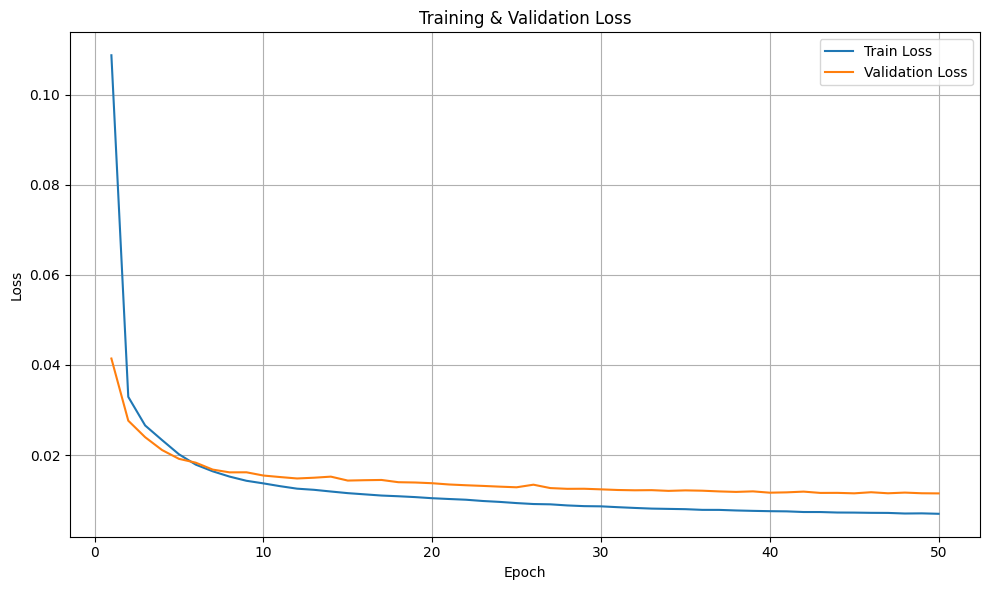

In [62]:
autoencoder_3.compile(optimizer='adam', loss='mae')

historia = autoencoder_3.fit(
    x_train_3, x_train_3,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_3, x_test_3),
    shuffle=True
)
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6/6 [==============================] - 0s 1ms/step


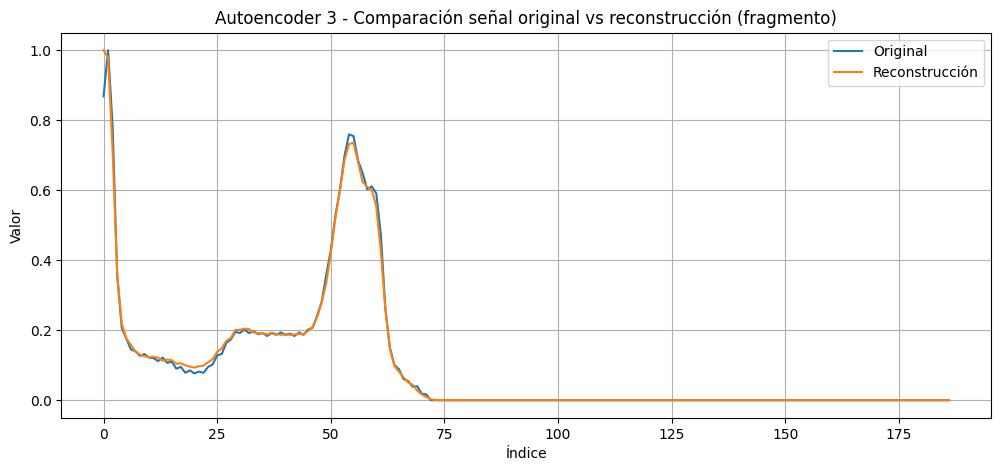

Error promedio de reconstrucción (MAE) en test: 0.011492
Errores de reconstrucción para primeras 5 muestras:
Muestra 0: 0.004518
Muestra 1: 0.011806
Muestra 2: 0.091646
Muestra 3: 0.024598
Muestra 4: 0.039756


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

reconstructions = autoencoder_3.predict(x_test_3)

ind = 0  
fragmento = 1000  

original = x_test_3.iloc[ind].to_numpy().flatten()
reconstruida = reconstructions[ind].flatten()

plt.figure(figsize=(12,5))
plt.plot(original[:fragmento], label='Original')
plt.plot(reconstruida[:fragmento], label='Reconstrucción')
plt.legend()
plt.title('Autoencoder 3 - Comparación señal original vs reconstrucción (fragmento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

reconstruction_errors = np.mean(np.abs(reconstructions - x_test_3.to_numpy()), axis=1)

print(f"Error promedio de reconstrucción (MAE) en test: {np.mean(reconstruction_errors):.6f}")

print("Errores de reconstrucción para primeras 5 muestras:")
for i in range(5):
    print(f"Muestra {i}: {reconstruction_errors[i]:.6f}")


Epoch 1/100
118/118 [==============================] - 3s 15ms/step - loss: 0.1406 - val_loss: 0.0689
Epoch 2/100
118/118 [==============================] - 2s 14ms/step - loss: 0.0573 - val_loss: 0.0501
Epoch 3/100
118/118 [==============================] - 2s 15ms/step - loss: 0.0465 - val_loss: 0.0439
Epoch 4/100
118/118 [==============================] - 2s 15ms/step - loss: 0.0411 - val_loss: 0.0402
Epoch 5/100
118/118 [==============================] - 2s 15ms/step - loss: 0.0388 - val_loss: 0.0381
Epoch 6/100
118/118 [==============================] - 2s 15ms/step - loss: 0.0373 - val_loss: 0.0387
Epoch 7/100
118/118 [==============================] - 2s 15ms/step - loss: 0.0360 - val_loss: 0.0360
Epoch 8/100
118/118 [==============================] - 2s 13ms/step - loss: 0.0349 - val_loss: 0.0346
Epoch 9/100
118/118 [==============================] - 1s 12ms/step - loss: 0.0341 - val_loss: 0.0343
Epoch 10/100
118/118 [==============================] - 1s 12ms/step - loss: 0.033

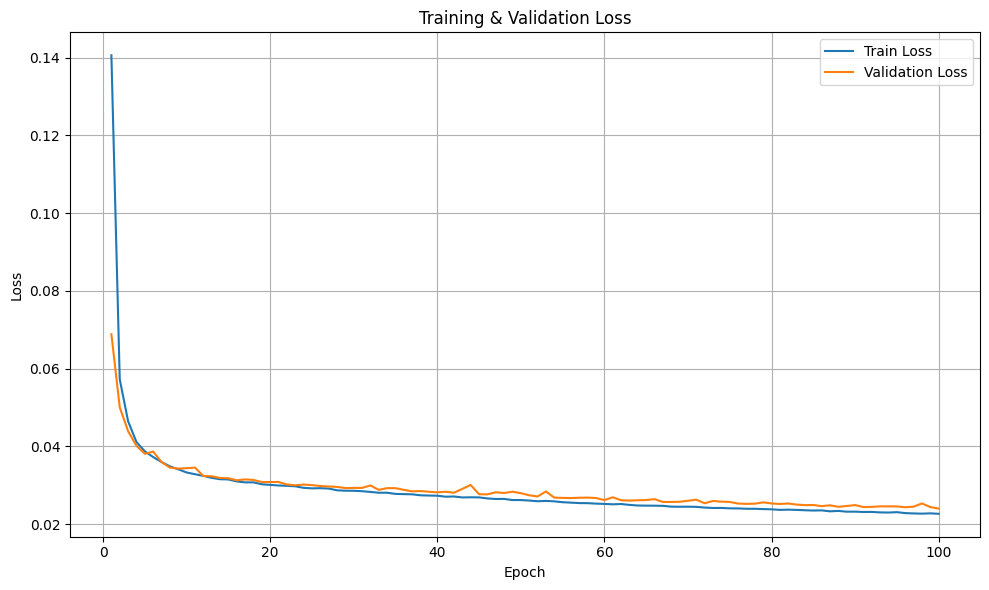

In [64]:
autoencoder_2.compile(optimizer='adam', loss='mae')

historia = autoencoder_2.fit(
    x_train_2, x_train_2,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_2, x_test_2),
    shuffle=True
)
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

46/46 [==============================] - 0s 551us/step


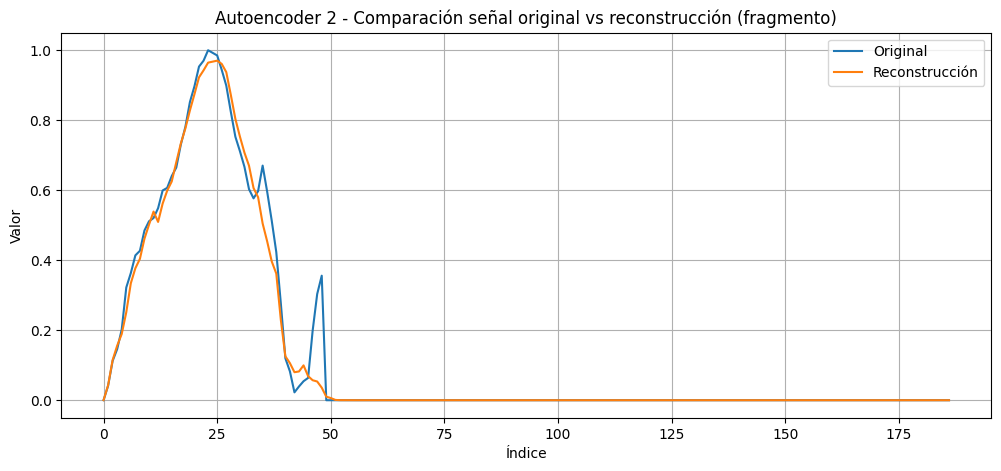

Autoencoder 2 - Error promedio reconstrucción (MAE): 0.024028
Autoencoder 2 - Errores primeras 5 muestras:
Muestra 0: 0.012481
Muestra 1: 0.016042
Muestra 2: 0.016549
Muestra 3: 0.025690
Muestra 4: 0.021327


In [ ]:
reconstructions_2 = autoencoder_2.predict(x_test_2)

original_2 = x_test_2.iloc[ind].to_numpy().flatten()
reconstruida_2 = reconstructions_2[ind].flatten()

plt.figure(figsize=(12,5))
plt.plot(original_2[:fragmento], label='Original')
plt.plot(reconstruida_2[:fragmento], label='Reconstrucción')
plt.legend()
plt.title('Autoencoder 2 - Comparación señal original vs reconstrucción (fragmento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

errors_2 = np.mean(np.abs(reconstructions_2 - x_test_2.to_numpy()), axis=1)
print(f"Autoencoder 2 - Error promedio reconstrucción (MAE): {np.mean(errors_2):.6f}")
print("Autoencoder 2 - Errores primeras 5 muestras:")
for i in range(5):
    print(f"Muestra {i}: {errors_2[i]:.6f}")


Epoch 1/50
118/118 [==============================] - 2s 12ms/step - loss: 0.1295 - val_loss: 0.0732
Epoch 2/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0550 - val_loss: 0.0512
Epoch 3/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0434 - val_loss: 0.0469
Epoch 4/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0397 - val_loss: 0.0404
Epoch 5/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0339 - val_loss: 0.0366
Epoch 6/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0323 - val_loss: 0.0354
Epoch 7/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0314 - val_loss: 0.0351
Epoch 8/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0307 - val_loss: 0.0342
Epoch 9/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0301 - val_loss: 0.0339
Epoch 10/50
118/118 [==============================] - 1s 11ms/step - loss: 0.0296 - val_lo

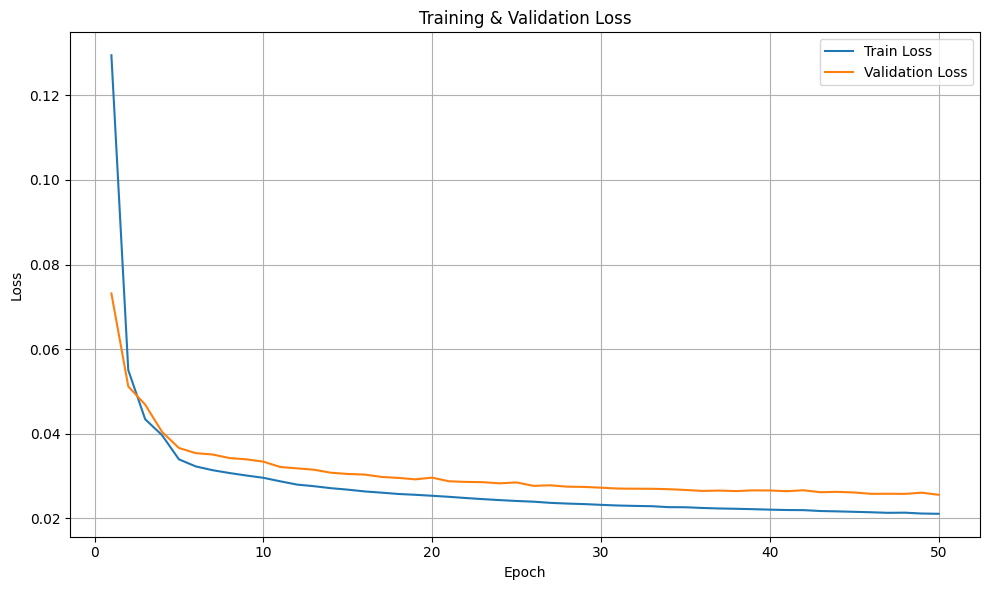

In [66]:
autoencoder_1.compile(optimizer='adam', loss='mae')

historia = autoencoder_1.fit(
    x_train_1, x_train_1,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_1, x_test_1),
    shuffle=True
)
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

18/18 [==============================] - 0s 666us/step


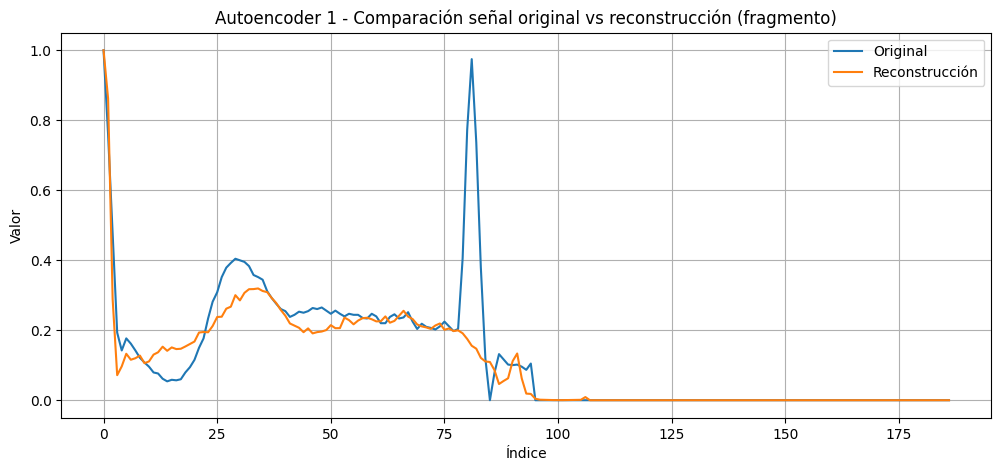

Autoencoder 1 - Error promedio reconstrucción (MAE): 0.025558
Autoencoder 1 - Errores primeras 5 muestras:
Muestra 0: 0.033953
Muestra 1: 0.025744
Muestra 2: 0.011259
Muestra 3: 0.023762
Muestra 4: 0.013856


In [ ]:
reconstructions_1 = autoencoder_1.predict(x_test_1)

original_1 = x_test_1.iloc[ind].to_numpy().flatten()
reconstruida_1 = reconstructions_1[ind].flatten()

plt.figure(figsize=(12,5))
plt.plot(original_1[:fragmento], label='Original')
plt.plot(reconstruida_1[:fragmento], label='Reconstrucción')
plt.legend()
plt.title('Autoencoder 1 - Comparación señal original vs reconstrucción (fragmento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

errors_1 = np.mean(np.abs(reconstructions_1 - x_test_1.to_numpy()), axis=1)
print(f"Autoencoder 1 - Error promedio reconstrucción (MAE): {np.mean(errors_1):.6f}")
print("Autoencoder 1 - Errores primeras 5 muestras:")
for i in range(5):
    print(f"Muestra {i}: {errors_1[i]:.6f}")


Epoch 1/100
142/142 [==============================] - 2s 12ms/step - loss: 0.1449 - val_loss: 0.0650
Epoch 2/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0533 - val_loss: 0.0463
Epoch 3/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0433 - val_loss: 0.0422
Epoch 4/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0410 - val_loss: 0.0402
Epoch 5/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0396 - val_loss: 0.0390
Epoch 6/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0382 - val_loss: 0.0383
Epoch 7/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0370 - val_loss: 0.0362
Epoch 8/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0354 - val_loss: 0.0349
Epoch 9/100
142/142 [==============================] - 2s 12ms/step - loss: 0.0339 - val_loss: 0.0331
Epoch 10/100
142/142 [==============================] - 2s 12ms/step - loss: 0.032

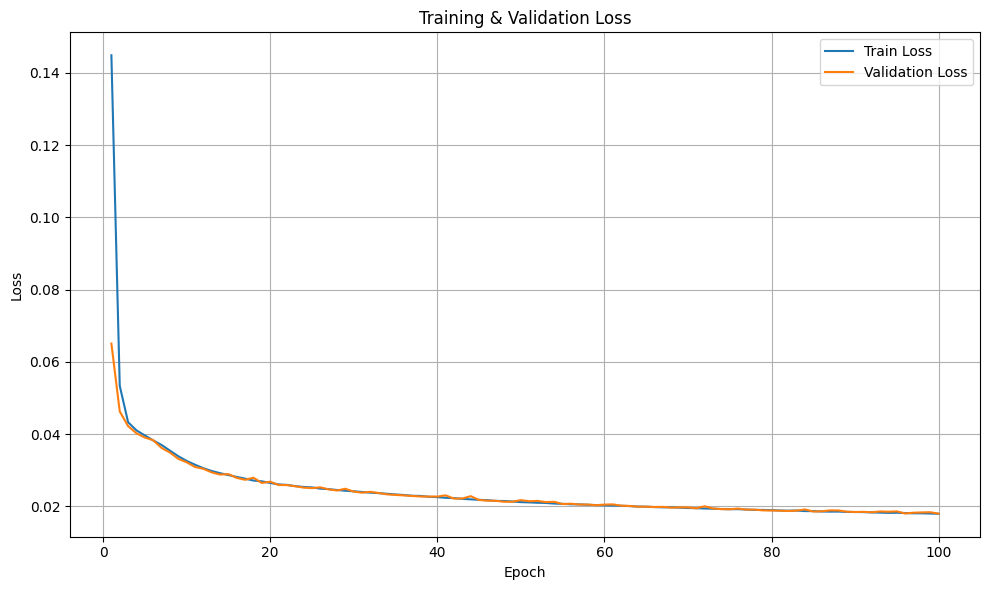

In [68]:
autoencoder_0.compile(optimizer='adam', loss='mae')

historia = autoencoder_0.fit(
    x_train_0, x_train_0,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_0, x_test_0),
    shuffle=True
)
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

567/567 [==============================] - 0s 503us/step


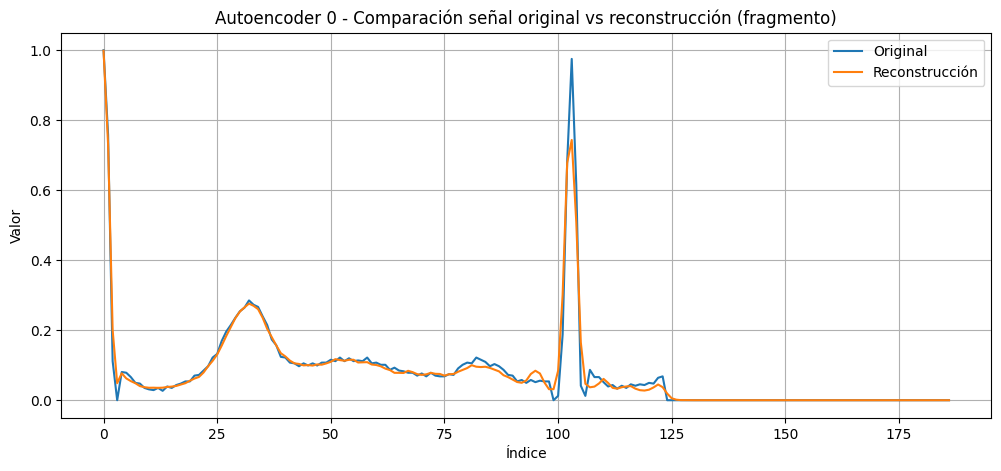

Autoencoder 0 - Error promedio reconstrucción (MAE): 0.017953
Autoencoder 0 - Errores primeras 5 muestras:
Muestra 0: 0.009786
Muestra 1: 0.024765
Muestra 2: 0.022157
Muestra 3: 0.008465
Muestra 4: 0.036227


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

reconstructions_0 = autoencoder_0.predict(x_test_0)

ind = 0
fragmento = 1000

original_0 = x_test_0.iloc[ind].to_numpy().flatten()
reconstruida_0 = reconstructions_0[ind].flatten()

plt.figure(figsize=(12,5))
plt.plot(original_0[:fragmento], label='Original')
plt.plot(reconstruida_0[:fragmento], label='Reconstrucción')
plt.legend()
plt.title('Autoencoder 0 - Comparación señal original vs reconstrucción (fragmento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

errors_0 = np.mean(np.abs(reconstructions_0 - x_test_0.to_numpy()), axis=1)
print(f"Autoencoder 0 - Error promedio reconstrucción (MAE): {np.mean(errors_0):.6f}")
print("Autoencoder 0 - Errores primeras 5 muestras:")
for i in range(5):
    print(f"Muestra {i}: {errors_0[i]:.6f}")


In [70]:
autoencoders = [autoencoder_0, autoencoder_1, autoencoder_2, autoencoder_3, autoencoder_4]
x_tests = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4]

for i in range(5):
    x_test_i = x_tests[i]
    ae = autoencoders[i]
    preds = ae.predict(x_test_i)
    errores = np.mean(np.abs(x_test_i - preds), axis=1)
    print(f"[AE{i}] MAE promedio en su propia clase: {np.mean(errores):.6f}")

567/567 [==============================] - 0s 495us/step
[AE0] MAE promedio en su propia clase: 0.017953
18/18 [==============================] - 0s 568us/step
[AE1] MAE promedio en su propia clase: 0.025558
46/46 [==============================] - 0s 552us/step
[AE2] MAE promedio en su propia clase: 0.024028
6/6 [==============================] - 0s 1ms/step
[AE3] MAE promedio en su propia clase: 0.011492
51/51 [==============================] - 0s 580us/step
[AE4] MAE promedio en su propia clase: 0.025533


In [71]:
for i in range(5):  # AE
    print(f"\n[AE{i}] Evaluación cruzada:")
    for j in range(5):  # Clase
        x_test_j = x_tests[j]
        preds = autoencoders[i].predict(x_test_j)
        errores = np.mean(np.abs(x_test_j - preds), axis=1)
        print(f"  - MAE en clase {j}: {np.mean(errores):.6f}")



[AE0] Evaluación cruzada:
567/567 [==============================] - 0s 509us/step
  - MAE en clase 0: 0.017953
18/18 [==============================] - 0s 565us/step
  - MAE en clase 1: 0.031118
46/46 [==============================] - 0s 549us/step
  - MAE en clase 2: 0.043503
6/6 [==============================] - 0s 623us/step
  - MAE en clase 3: 0.013530
51/51 [==============================] - 0s 557us/step
  - MAE en clase 4: 0.045822

[AE1] Evaluación cruzada:
567/567 [==============================] - 0s 498us/step
  - MAE en clase 0: 0.043370
18/18 [==============================] - 0s 595us/step
  - MAE en clase 1: 0.025558
46/46 [==============================] - 0s 554us/step
  - MAE en clase 2: 0.063693
6/6 [==============================] - 0s 801us/step
  - MAE en clase 3: 0.032792
51/51 [==============================] - 0s 567us/step
  - MAE en clase 4: 0.078000

[AE2] Evaluación cruzada:
567/567 [==============================] - 0s 494us/step
  - MAE en clase 0: 0.

51/51 [==============================] - 0s 538us/step


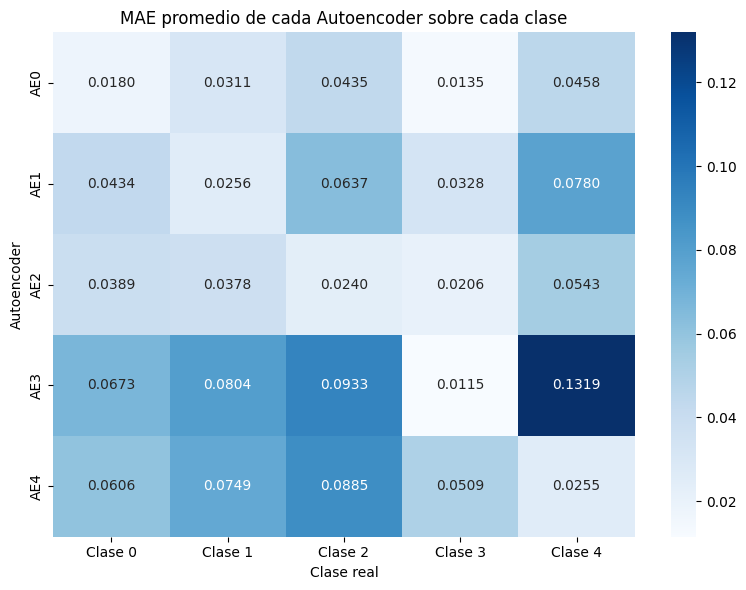

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

mae_matrix = []

for i in range(5):  # AE
    fila = []
    for j in range(5):  # Clase
        x_test_j = x_tests[j]
        preds = autoencoders[i].predict(x_test_j)
        errores = np.mean(np.abs(x_test_j - preds), axis=1)
        fila.append(np.mean(errores))
    mae_matrix.append(fila)

mae_df = pd.DataFrame(mae_matrix, columns=[f"Clase {i}" for i in range(5)], index=[f"AE{i}" for i in range(5)])

plt.figure(figsize=(8, 6))
sns.heatmap(mae_df, annot=True, fmt=".4f", cmap="Blues")
plt.title("MAE promedio de cada Autoencoder sobre cada clase")
plt.xlabel("Clase real")
plt.ylabel("Autoencoder")
plt.tight_layout()
plt.show()


In [73]:
x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4]
autoencoders = [autoencoder_0, autoencoder_1, autoencoder_2, autoencoder_3, autoencoder_4]

mae_por_ae = []
umbrales_ae = []

for i, (ae, x_test_i) in enumerate(zip(autoencoders, x_test_list)):
    reconstrucciones = ae.predict(x_test_i)
    errores = np.mean(np.abs(x_test_i - reconstrucciones), axis=1)
    
    media = np.mean(errores)
    std = np.std(errores)
    
    umbral_base = media + 1 * std  
    mae_por_ae.append(errores)
    umbrales_ae.append(umbral_base)
    
    print(f"AE{i} - Media: {media:.4f}, STD: {std:.4f}, Umbral base: {umbral_base:.4f}")

deteccion_normal = np.zeros((5,5))

for i in range(5):
    for j in range(5):  
        x_test_j = x_test_list[j]
        preds = autoencoders[i].predict(x_test_j)
        errores = np.mean(np.abs(x_test_j - preds), axis=1)

        if i in [0,1,2] and j == 3:
            umbral = np.mean(errores) + 0.5 * np.std(errores)
        else:
            umbral = umbrales_ae[i]

        deteccion_normal[i, j] = np.mean(errores < umbral)

print("\nPorcentaje de muestras detectadas como 'normales' por cada Autoencoder (dentro de su umbral):\n")
encabezado = "          " + "".join([f"Clase {j}   " for j in range(5)])
print(encabezado)
print("         " + "-" * (len(encabezado) - 9))

for i in range(5):
    fila = f"AE{i}     " + "".join([f"{deteccion_normal[i, j]:.2f}      " for j in range(5)])
    print(fila)


567/567 [==============================] - 0s 511us/step
AE0 - Media: 0.0180, STD: 0.0093, Umbral base: 0.0273
18/18 [==============================] - 0s 617us/step
AE1 - Media: 0.0256, STD: 0.0177, Umbral base: 0.0433
46/46 [==============================] - 0s 560us/step
AE2 - Media: 0.0240, STD: 0.0127, Umbral base: 0.0368
6/6 [==============================] - 0s 1ms/step
AE3 - Media: 0.0115, STD: 0.0126, Umbral base: 0.0241
51/51 [==============================] - 0s 536us/step
AE4 - Media: 0.0255, STD: 0.0101, Umbral base: 0.0356
51/51 [==============================] - 0s 566us/step

Porcentaje de muestras detectadas como 'normales' por cada Autoencoder (dentro de su umbral):

          Clase 0   Clase 1   Clase 2   Clase 3   Clase 4   
         ---------------------------------------------------
AE0     0.88      0.52      0.17      0.83      0.10      
AE1     0.63      0.89      0.19      0.86      0.08      
AE2     0.53      0.52      0.90      0.77      0.12      
AE3    

In [ ]:
import numpy as np

umbrales_por_ae_clase = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        x_test_j = x_tests[j]
        preds = autoencoders[i].predict(x_test_j, verbose=0)
        errores = np.mean(np.abs(x_test_j - preds), axis=1)

        media = np.mean(errores)
        std = np.std(errores)
        
        if i == 4 and j == 0:
            factor = 0
        else:
            if i == j:
                factor = 1.2
            elif i in [0, 1, 2] and j == 3:
                factor = 0.07
            else:
                factor = 0.1

        umbral = media + factor * std

        umbral_min = media * 0.5
        if umbral < umbral_min:
            umbral = umbral_min

        umbrales_por_ae_clase[i, j] = umbral

        print(f"AE{i} Clase{j} - Media: {media:.4f}, STD: {std:.4f}, Factor: {factor}, Umbral: {umbral:.4f}")

deteccion_normal = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        x_test_j = x_tests[j]
        preds = autoencoders[i].predict(x_test_j, verbose=0)
        errores = np.mean(np.abs(x_test_j - preds), axis=1)
        deteccion_normal[i, j] = np.mean(errores < umbrales_por_ae_clase[i, j])

print("\nPorcentaje de muestras detectadas como 'normales' por cada Autoencoder (umbral refinado):\n")

encabezado = "           " + "".join([f"Clase {j}   " for j in range(5)])
print(encabezado)
print("           " + "-" * (len(encabezado) - 11))

for i in range(5):
    fila = f"AE{i}       " + "".join([f"{deteccion_normal[i, j]:.2f}      " for j in range(5)])
    print(fila)
    
np.save("umbrales_por_ae_clase.npy", umbrales_por_ae_clase)
print("\nUmbrales guardados en 'umbrales_por_ae_clase.npy'.")


AE0 Clase0 - Media: 0.0180, STD: 0.0093, Factor: 1.2, Umbral: 0.0291
AE0 Clase1 - Media: 0.0311, STD: 0.0143, Factor: 0.1, Umbral: 0.0325
AE0 Clase2 - Media: 0.0435, STD: 0.0210, Factor: 0.1, Umbral: 0.0456
AE0 Clase3 - Media: 0.0135, STD: 0.0065, Factor: 0.07, Umbral: 0.0140
AE0 Clase4 - Media: 0.0458, STD: 0.0163, Factor: 0.1, Umbral: 0.0475
AE1 Clase0 - Media: 0.0434, STD: 0.0220, Factor: 0.1, Umbral: 0.0456
AE1 Clase1 - Media: 0.0256, STD: 0.0177, Factor: 1.2, Umbral: 0.0468
AE1 Clase2 - Media: 0.0637, STD: 0.0292, Factor: 0.1, Umbral: 0.0666
AE1 Clase3 - Media: 0.0328, STD: 0.0117, Factor: 0.07, Umbral: 0.0336
AE1 Clase4 - Media: 0.0780, STD: 0.0247, Factor: 0.1, Umbral: 0.0805
AE2 Clase0 - Media: 0.0389, STD: 0.0126, Factor: 0.1, Umbral: 0.0402
AE2 Clase1 - Media: 0.0378, STD: 0.0127, Factor: 0.1, Umbral: 0.0391
AE2 Clase2 - Media: 0.0240, STD: 0.0127, Factor: 1.2, Umbral: 0.0393
AE2 Clase3 - Media: 0.0206, STD: 0.0069, Factor: 0.07, Umbral: 0.0211
AE2 Clase4 - Media: 0.0543, STD

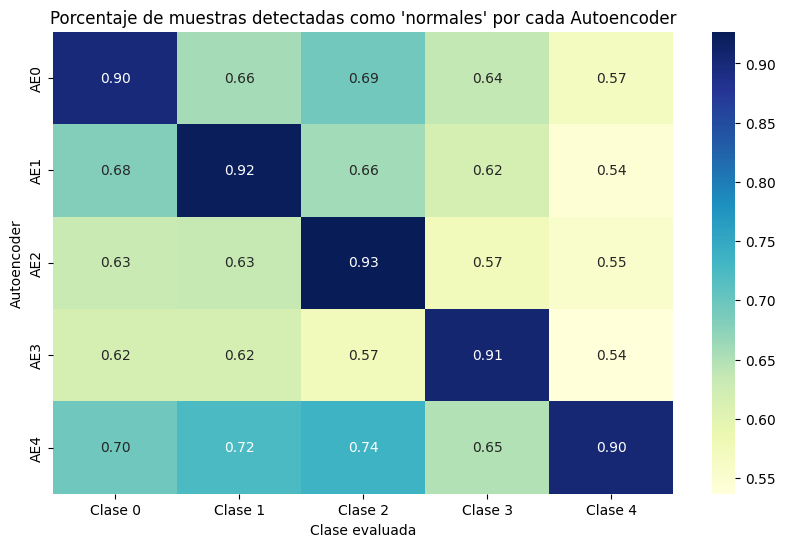

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(deteccion_normal, annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=[f"Clase {i}" for i in range(5)],
            yticklabels=[f"AE{i}" for i in range(5)])
plt.title("Porcentaje de muestras detectadas como 'normales' por cada Autoencoder")
plt.xlabel("Clase evaluada")
plt.ylabel("Autoencoder")
plt.show()


In [106]:
autoencoder_0.save("autoencoder_0.h5")
autoencoder_1.save("autoencoder_1.h5")
autoencoder_2.save("autoencoder_2.h5")
autoencoder_3.save("autoencoder_3.h5")
autoencoder_4.save("autoencoder_4.h5")

c:\Users\matia\Documents\codigoCosas\proyectoPortafolio\entrega_2\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
autoencoder_0 = load_model("autoencoder_0.h5")
autoencoder_1 = load_model("autoencoder_1.h5")
autoencoder_2 = load_model("autoencoder_2.h5")
autoencoder_3 = load_model("autoencoder_3.h5")
autoencoder_4 = load_model("autoencoder_4.h5")

def separar_encoder_decoder(autoencoder, latente_size, capas_encoder, capas_decoder_start):
    """
    Separa encoder y decoder de un autoencoder ya cargado.
    - autoencoder: modelo Keras cargado.
    - latente_size: tamaño de la capa latente (int).
    - capas_encoder: índices de capas para el encoder (inclusive).
    - capas_decoder_start: índice de capa para comenzar el decoder.
    """
    entrada = autoencoder.input

    x = entrada
    for i in capas_encoder:
        x = autoencoder.layers[i](x)
    encoder = Model(inputs=entrada, outputs=x)

    entrada_latente = Input(shape=(latente_size,))
    x = entrada_latente
    for i in range(capas_decoder_start, len(autoencoder.layers)):
        x = autoencoder.layers[i](x)
    decoder = Model(inputs=entrada_latente, outputs=x)

    return encoder, decoder


model_info = {
    0: {"file": "autoencoder_0.h5", "latente_size":16, "encoder_layers": [1,2,3,4], "decoder_start": 5},
    1: {"file": "autoencoder_1.h5", "latente_size":16, "encoder_layers": [1,2,3,4], "decoder_start": 5},
    2: {"file": "autoencoder_2.h5", "latente_size":16, "encoder_layers": [1,2,3,4], "decoder_start": 5},
    3: {"file": "autoencoder_3.h5", "latente_size":16, "encoder_layers": [1,2,3,4,5], "decoder_start": 6},
    4: {"file": "autoencoder_4.h5", "latente_size":16, "encoder_layers": [1,2,3,4], "decoder_start": 5},
}

encoders = {}
decoders = {}

for i in range(5):
    print(f"Cargando modelo {i} desde {model_info[i]['file']} ...")
    ae = load_model(model_info[i]['file'])
    enc, dec = separar_encoder_decoder(ae,
                                       latente_size=model_info[i]["latente_size"],
                                       capas_encoder=model_info[i]["encoder_layers"],
                                       capas_decoder_start=model_info[i]["decoder_start"])
    encoders[i] = enc
    decoders[i] = dec
    print(f"Modelo {i}: Encoder y Decoder extraídos.\n")


Cargando modelo 0 desde autoencoder_0.h5 ...
Modelo 0: Encoder y Decoder extraídos.

Cargando modelo 1 desde autoencoder_1.h5 ...
Modelo 1: Encoder y Decoder extraídos.

Cargando modelo 2 desde autoencoder_2.h5 ...
Modelo 2: Encoder y Decoder extraídos.

Cargando modelo 3 desde autoencoder_3.h5 ...
Modelo 3: Encoder y Decoder extraídos.

Cargando modelo 4 desde autoencoder_4.h5 ...
Modelo 4: Encoder y Decoder extraídos.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

def generar_codificaciones_sinteticas(codificaciones_reales, n=10000, ruido=0.1):
    media = np.mean(codificaciones_reales, axis=0)
    std = np.std(codificaciones_reales, axis=0)
    return np.random.normal(loc=media, scale=ruido * std, size=(n, codificaciones_reales.shape[1]))

def evaluar_seniales(reales, sinteticas):
    n = min(len(reales), len(sinteticas))
    mae_list, mse_list, corr_list = [], [], []

    for i in range(n):
        mae_list.append(mean_absolute_error(reales[i], sinteticas[i]))
        mse_list.append(mean_squared_error(reales[i], sinteticas[i]))
        corr, _ = pearsonr(reales[i], sinteticas[i])
        corr_list.append(corr)

    print(f"MAE promedio: {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
    print(f"MSE promedio: {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
    print(f"Correlación promedio: {np.mean(corr_list):.4f} ± {np.std(corr_list):.4f}")


for clase_objetivo in range(5):  
    print(f"\n===== Procesando Clase {clase_objetivo} =====")

    encoder = encoders[clase_objetivo]
    decoder = decoders[clase_objetivo]
    autoencoder = autoencoders[clase_objetivo]

    reales = train_df_scaled[train_df_scaled['label'] == clase_objetivo].iloc[:, :-1].values

    codificaciones_reales = encoder.predict(
        x_test_scaled[test_df_scaled['label'] == clase_objetivo], verbose=0
    )

    cod_sint = generar_codificaciones_sinteticas(codificaciones_reales, n=10000, ruido=0.1)
    seniales_sinteticas = decoder.predict(cod_sint, verbose=0)

    reconstruidas = autoencoder.predict(seniales_sinteticas, verbose=0)
    errores = np.mean(np.abs(seniales_sinteticas - reconstruidas), axis=1)

    umbral = umbrales_por_ae_clase[clase_objetivo, clase_objetivo]

    seniales_filtradas = seniales_sinteticas[errores < umbral]
    print(f"Señales sintéticas válidas según AE{clase_objetivo}: {len(seniales_filtradas)} de {len(seniales_sinteticas)}")

    if len(seniales_filtradas) == 0:
        print("No hay señales sintéticas válidas para evaluar.")
        continue

    seniales_filtradas_scaled = scaler.transform(seniales_filtradas)
    evaluar_seniales(reales, seniales_filtradas_scaled)



===== Procesando Clase 0 =====
Señales sintéticas válidas según AE0: 10000 de 10000
MAE promedio: 0.1110 ± 0.0858
MSE promedio: 0.0406 ± 0.0533
Correlación promedio: 0.5883 ± 0.1558

===== Procesando Clase 1 =====
Señales sintéticas válidas según AE1: 10000 de 10000
MAE promedio: 0.1292 ± 0.0674
MSE promedio: 0.0426 ± 0.0298
Correlación promedio: 0.6259 ± 0.1859

===== Procesando Clase 2 =====
Señales sintéticas válidas según AE2: 10000 de 10000
MAE promedio: 0.1794 ± 0.0856
MSE promedio: 0.0745 ± 0.0504
Correlación promedio: 0.4254 ± 0.3356

===== Procesando Clase 3 =====
Señales sintéticas válidas según AE3: 10000 de 10000
MAE promedio: 0.0625 ± 0.0585
MSE promedio: 0.0224 ± 0.0434
Correlación promedio: 0.7197 ± 0.1321

===== Procesando Clase 4 =====
Señales sintéticas válidas según AE4: 10000 de 10000
MAE promedio: 0.1121 ± 0.0410
MSE promedio: 0.0292 ± 0.0165
Correlación promedio: 0.8242 ± 0.1342


Forma del array: (10000, 187)
Primeros valores:
 [[9.99999881e-01 8.28386188e-01 4.81634408e-01 2.15560183e-01
  1.15814671e-01 1.12087607e-01 1.07479915e-01 8.56990367e-02
  8.56143162e-02 7.54535794e-02 7.97831342e-02 6.75348863e-02
  6.02128170e-02 5.52743860e-02 5.76170571e-02 4.52834181e-02
  4.68286425e-02 5.04874997e-02 5.00400849e-02 5.09019457e-02
  5.55447750e-02 6.51698485e-02 1.06273323e-01 1.22420073e-01
  1.56596780e-01 1.85701177e-01 1.84001967e-01 2.10871547e-01
  2.18698055e-01 2.29300573e-01 2.28727877e-01 2.09370717e-01
  1.96104765e-01 1.78969622e-01 1.79223165e-01 1.62605107e-01
  1.62476480e-01 1.53278887e-01 1.41354233e-01 1.35326937e-01
  1.34965807e-01 1.28227055e-01 1.34722620e-01 1.29419893e-01
  1.36575282e-01 1.42017245e-01 1.51007891e-01 1.46922648e-01
  1.50453195e-01 1.54088929e-01 1.82584152e-01 1.53972626e-01
  1.63032547e-01 1.56462684e-01 1.52853116e-01 1.62495047e-01
  1.63358316e-01 1.57348976e-01 1.59254789e-01 1.72260359e-01
  1.55268952e-01 1.34

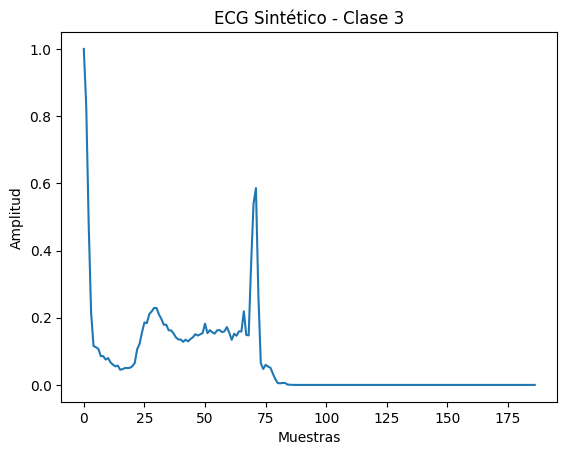

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ecg = np.load("ecg_sinteticos_clase3.npy")

print("Forma del array:", ecg.shape)

print("Primeros valores:\n", ecg[:5])

plt.plot(ecg[0])
plt.title("ECG Sintético - Clase 3")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()
